In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from main import eda, cross_validation, rmse, rmsle
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

np.set_printoptions(suppress=True, formatter={'float_kind':'{:.2f}'.format})
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2
%matplotlib inline





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
wine = pd.read_csv('winequality-red.csv', delimiter=";")

In [9]:
wine.isna().sum().sort_values()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
X = wine.drop(columns = ['quality'])
y = wine.quality
#y = df.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 15)
model= LinearRegression().fit(X_train, y_train)
y_hat = model.predict(X_test)
r2_score(y_test,y_hat)

0.3071213019576038

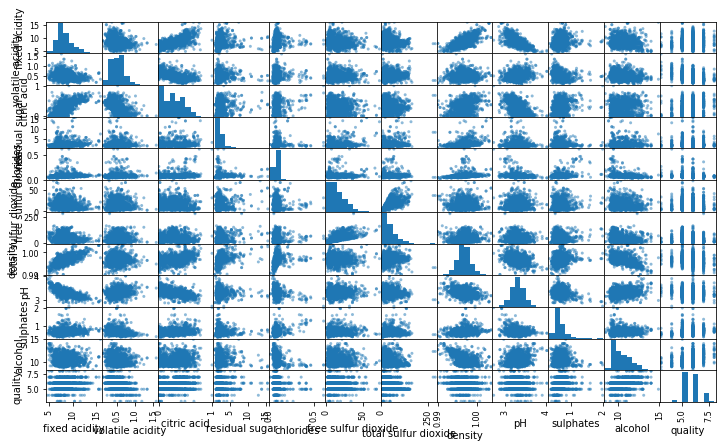

In [11]:
scatter_matrix(wine, figsize=(12,7));

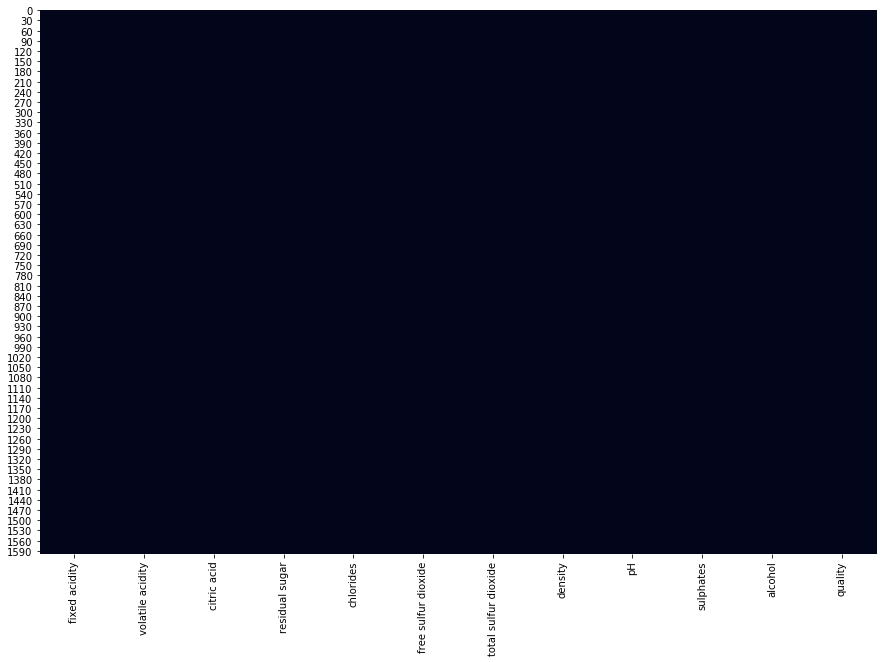

In [12]:
plt.figure(figsize=(15, 10))
sns.heatmap(~wine.isna(), cbar=False);

In [13]:
x_scalar = StandardScaler().fit(X)
X_scaled = x_scalar.transform(X)
X_scaled[0]

array([-0.53, 0.96, -1.39, -0.45, -0.24, -0.47, -0.38, 0.56, 1.29, -0.58,
       -0.96])

In [14]:
X_sc = pd.DataFrame(X_scaled)

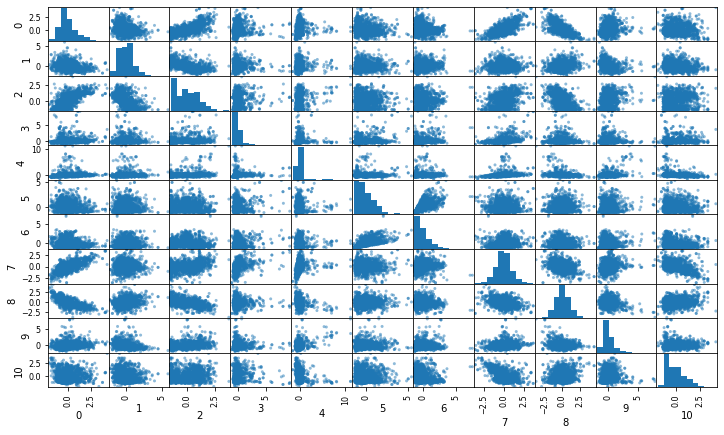

In [16]:
scatter_matrix(X_sc, figsize=(12,7));

In [17]:
cross_validation(LinearRegression(), X.values, y, 10, [r2_score, rmse, rmsle])

array([0.24, 0.66, 0.10])

In [18]:
cross_validation(LinearRegression(), X_scaled, y, 10, [r2_score, rmse, rmsle])

array([0.24, 0.66, 0.10])

In [20]:
for α in np.logspace(-4, 4, 9):
    print(α, cross_validation(Ridge(alpha=α), X_scaled, y, 10, [r2_score, rmse, rmsle]))

0.0001 [0.24 0.66 0.10]
0.001 [0.24 0.66 0.10]
0.01 [0.24 0.66 0.10]
0.1 [0.24 0.66 0.10]
1.0 [0.24 0.66 0.10]
10.0 [0.24 0.66 0.10]
100.0 [0.24 0.66 0.10]
1000.0 [0.22 0.67 0.10]
10000.0 [0.00 0.76 0.12]


In [21]:
for α in np.logspace(-4, 4, 9):
    print(α, cross_validation(Lasso(alpha=α), X_scaled, y, 10, [r2_score, rmse, rmsle]))

0.0001 [0.24 0.66 0.10]
0.001 [0.24 0.66 0.10]
0.01 [0.24 0.66 0.10]
0.1 [0.20 0.68 0.10]
1.0 [-0.13 0.81 0.12]
10.0 [-0.13 0.81 0.12]
100.0 [-0.13 0.81 0.12]
1000.0 [-0.13 0.81 0.12]
10000.0 [-0.13 0.81 0.12]


In [22]:
corr = wine.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


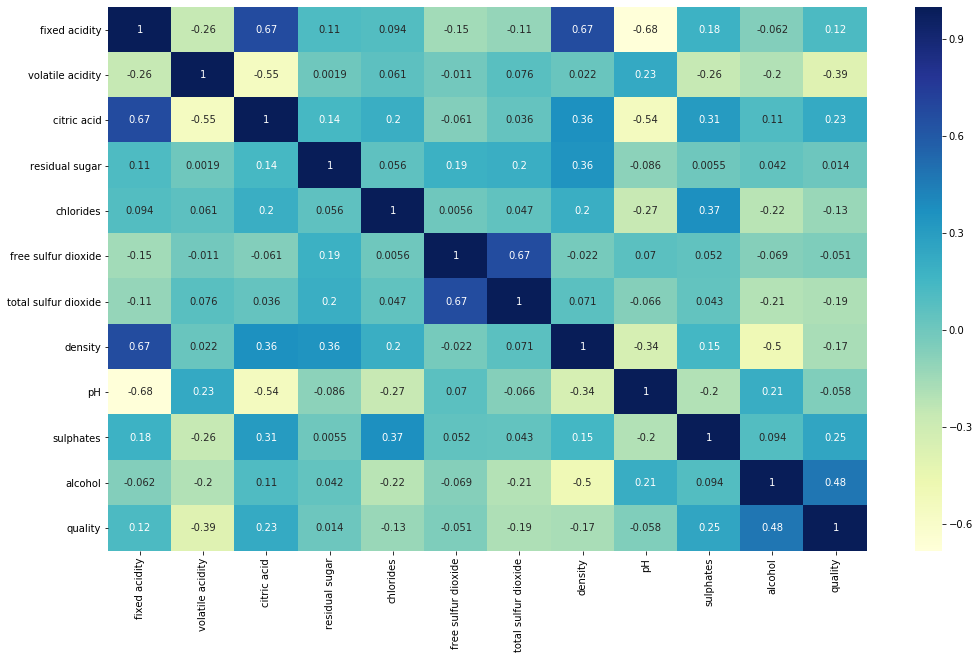

In [23]:
plt.figure(figsize=(17, 10))
sns.heatmap(corr, annot=True, cbar=True, cmap='YlGnBu');

In [25]:
y = wine.quality
X = wine.drop(columns=['residual sugar', 'quality',])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
results = sm.OLS(y_train, X_train).fit()


In [26]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.37159792841768846

In [39]:
y = wine.quality
X = wine.drop(columns=['residual sugar', 'quality', 'fixed acidity', 'free sulfur dioxide'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
results = sm.OLS(y_train, X_train).fit()


In [40]:
y_hat = results.predict(X_test)
r2_score(y_test, y_hat)

0.37045097558612605

In [48]:
x_scalar = StandardScaler().fit(X)
X_scaled = x_scalar.transform(X)
X_scaled[0]
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.25, random_state=42)

In [68]:
#KNN 
knn9_distance = KNeighborsRegressor(n_neighbors= 9, weights = 'distance')
knn9_distance.fit(X_train_scaled, y_train_scaled) 
y_hat_knn = knn9_distance.predict(X_test_scaled)


In [69]:
r2 = r2_score(y_test_scaled, y_hat_knn)
r2

0.4645723471607267

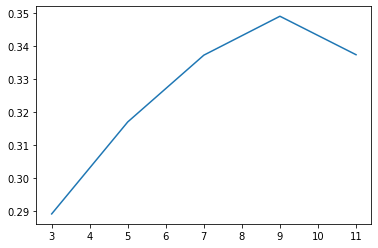

In [51]:
#plot the K
r2s = []
ks  = [3,5,7,9,11]
for k in ks: 
    knn = knn = KNeighborsRegressor(n_neighbors= k, weights = 'uniform').fit(X_train_scaled, y_train_scaled)
    yh= knn.predict(X_test_scaled)
    r2 = r2_score(y_test_scaled,yh)
    r2s.append(r2)

plt.plot(ks,r2s)

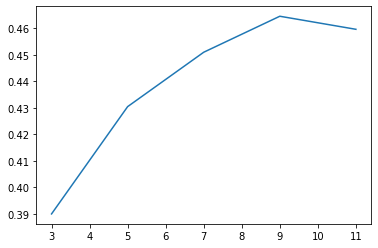

In [64]:
#plot the K
r2s = []
ks  = [3,5,7,9,11]
for k in ks: 
    knn = knn = KNeighborsRegressor(n_neighbors= k, weights = 'distance').fit(X_train_scaled, y_train_scaled)
    yh= knn.predict(X_test_scaled)
    r2 = r2_score(y_test_scaled,yh)
    r2s.append(r2)

plt.plot(ks,r2s)

In [67]:
#select model###################### 
y_2 = wine.quality
X_2 = wine.drop(columns=['residual sugar', 'quality',])
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.25, random_state=42)
results = sm.OLS(y_train_2, X_train_2).fit()
y_hat = results.predict(X_test_2)
r2_score(y_test_2, y_hat)

0.37159792841768846